In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from acquire import *
from prepare import *
from nlp_prepare_functions import *
from nlp_modeling_functions import *
import IPython

In [2]:
links = get_links_to_bills()

In [3]:
df = acquire_bills(links, filename="master_df.csv")

In [4]:
df = df[df.bill_text != "None"]

In [5]:
df = df.sample(3000)

In [6]:
df.bill_text.apply(basic_clean)

10876     body  pre   congressional bills 117th congres...
24922     body  pre   congressional bills 117th congres...
3755      body  pre   congressional bills 116th congres...
18246     body  pre   congressional bills 117th congres...
12405     body  pre   congressional bills 117th congres...
                               ...                        
5960      body  pre   congressional bills 116th congres...
18854     body  pre   congressional bills 117th congres...
21802     body  pre   congressional bills 117th congres...
2315      body  pre   congressional bills 116th congres...
16687     body  pre   congressional bills 117th congres...
Name: bill_text, Length: 3000, dtype: object

In [7]:
#df = prepare_bills_for_processing(df)

In [8]:
df = df[(df.party == "D") | (df.party == "R")]

In [9]:
df.bill_text = df.bill_text.apply(tokenized, tokenize_tool=3)

In [10]:
df.bill_text = df.bill_text.apply(stemmerize_tool, stemmer_type=3)

In [11]:
train, validate, test = train_validate(df, stratify_col = "party")

# Modeling

In [12]:
X_train, y_train, X_val, y_val, X_test, y_test = train_val_test(train, validate, test, target_col = "party")

In [13]:
X_train, X_val, X_test = vectorize_data(X_train, X_val, X_test, target_col = "bill_text")

                 Model  Recall on Train  Recall on Validate  Difference
0        Decision Tree           0.7047              0.6226        0.08
1        Random Forest           0.6851              0.6447        0.04
2                  KNN           0.7929              0.6384        0.15
3  Logistic Regression           0.8474              0.6960        0.15


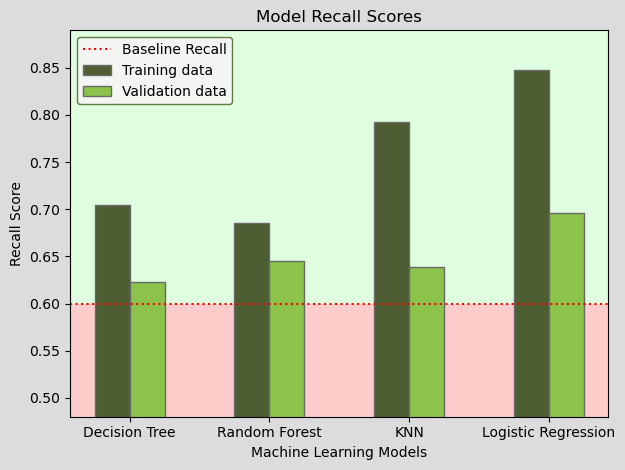

In [14]:
find_model_scores(X_train, y_train, X_val, y_val, metric = 1, print_scores = True)

In [15]:
IPython.display.Audio("ding.mp3", autoplay=True)